![New York City schoolbus](schoolbus.jpg)

Credits: photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance. (I added them in Read.me file on my github repository)

In [51]:
# Re-run this cell 
import pandas as pd
import matplotlib.pyplot as plt
# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

# Start coding here...

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [52]:
#Subset the data to find the NYC schools with best math results (at least 80%, 800 is the max grade) and printing the result out to see them
best_math_results = schools['average_math'] >= 800 * 0.8
best_math_schools = schools[best_math_results][['school_name', 'average_math']].sort_values(by='average_math', ascending=False)
print(best_math_schools)

                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641


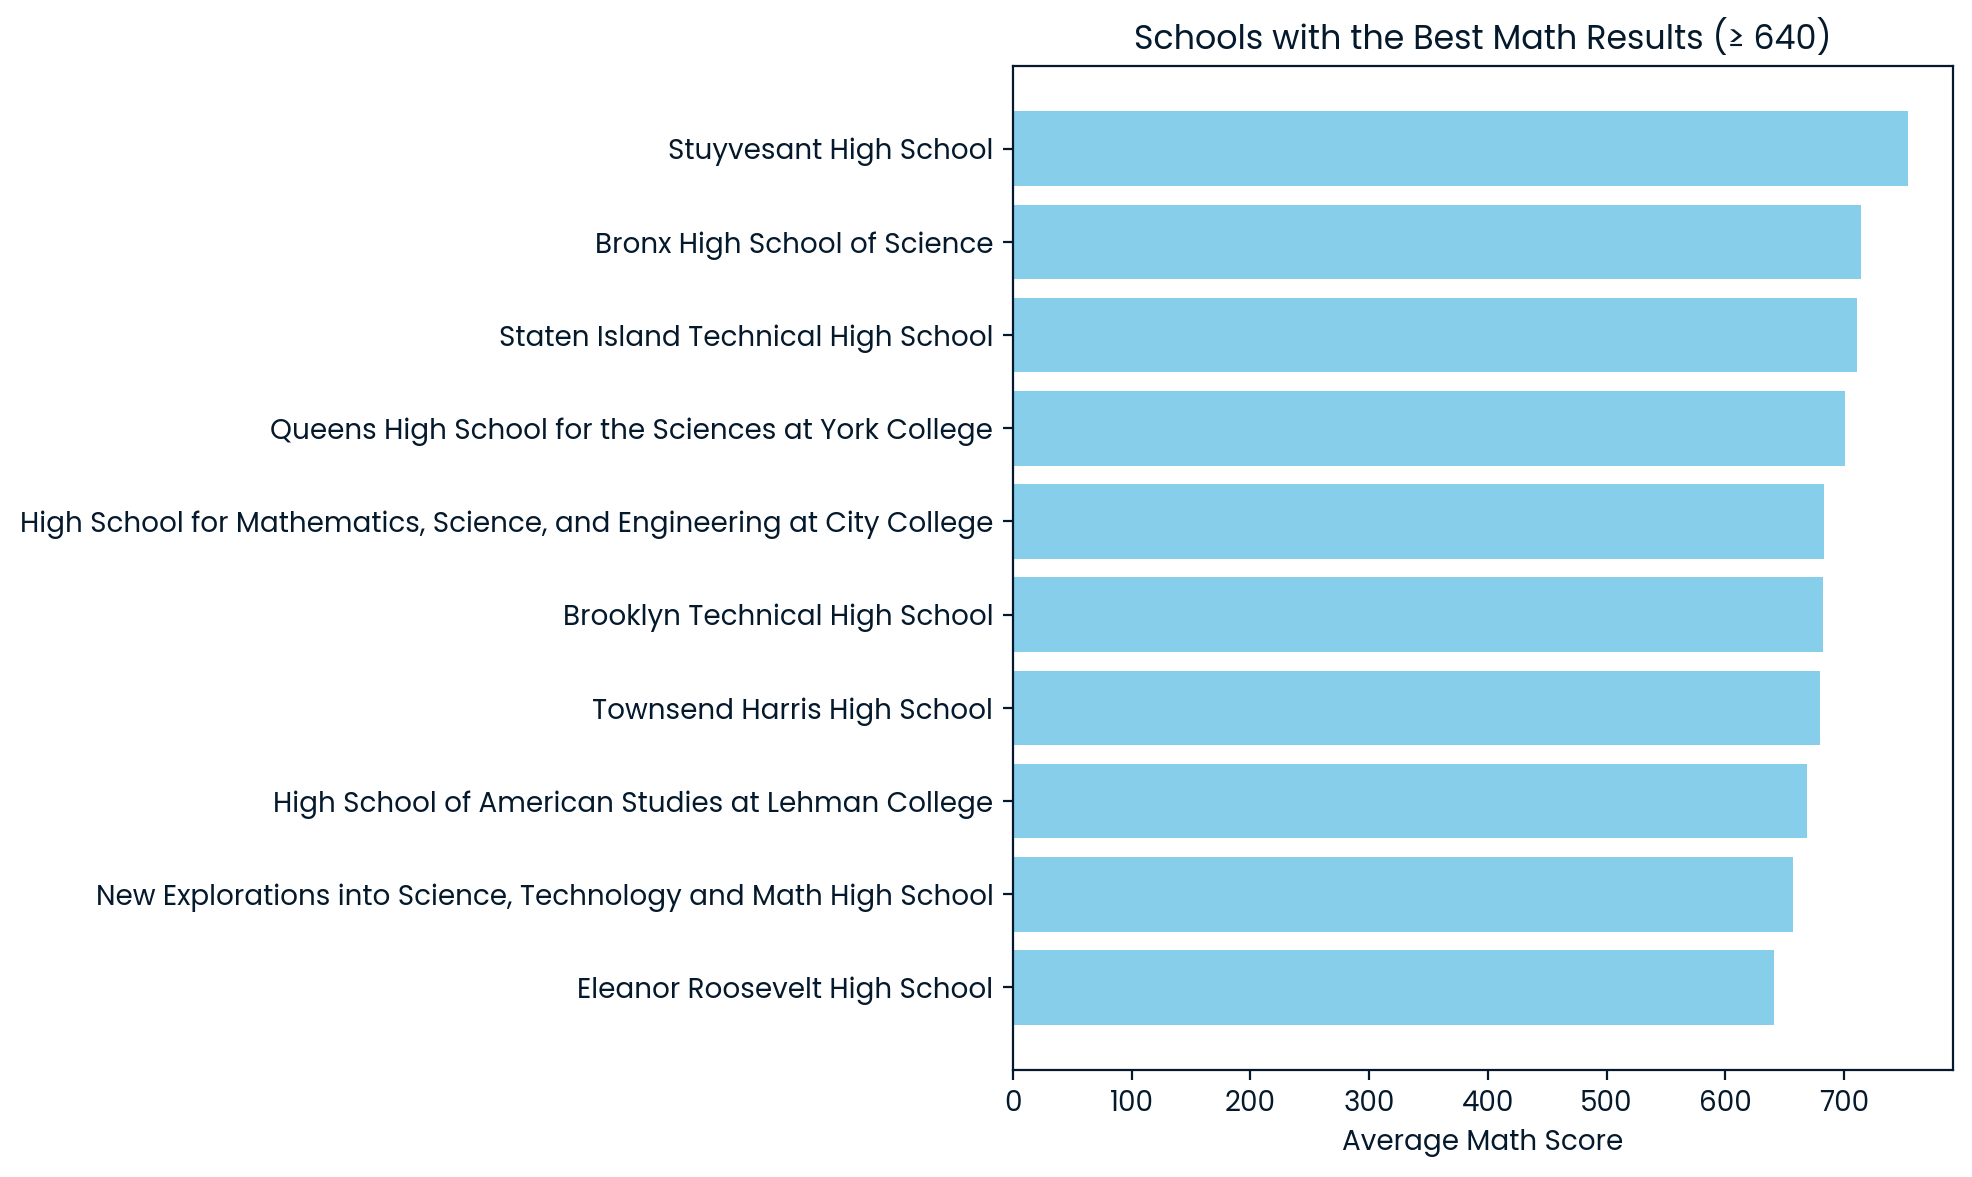

In [53]:
plt.figure(figsize=(10, 6))
plt.barh(best_math_schools['school_name'], best_math_schools['average_math'], color='skyblue')
plt.xlabel('Average Math Score')
plt.title('Schools with the Best Math Results (≥ 640)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [54]:
#Choosing the top 10 performing schools based on combined SAT scores (math, reading, writing)
schools['total_SAT'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']
top_10_schools = schools[['school_name', 'total_SAT']].sort_values(by='total_SAT',ascending=False).head(10)
print(top_10_schools)

                                           school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical High School       2041
174  High School of American Studies at Lehman College       2013
333                        Townsend Harris High School       1981
365  Queens High School for the Sciences at York Co...       1947
5                       Bard High School Early College       1914
280                     Brooklyn Technical High School       1896
45                       Eleanor Roosevelt High School       1889
68   High School for Mathematics, Science, and Engi...       1889


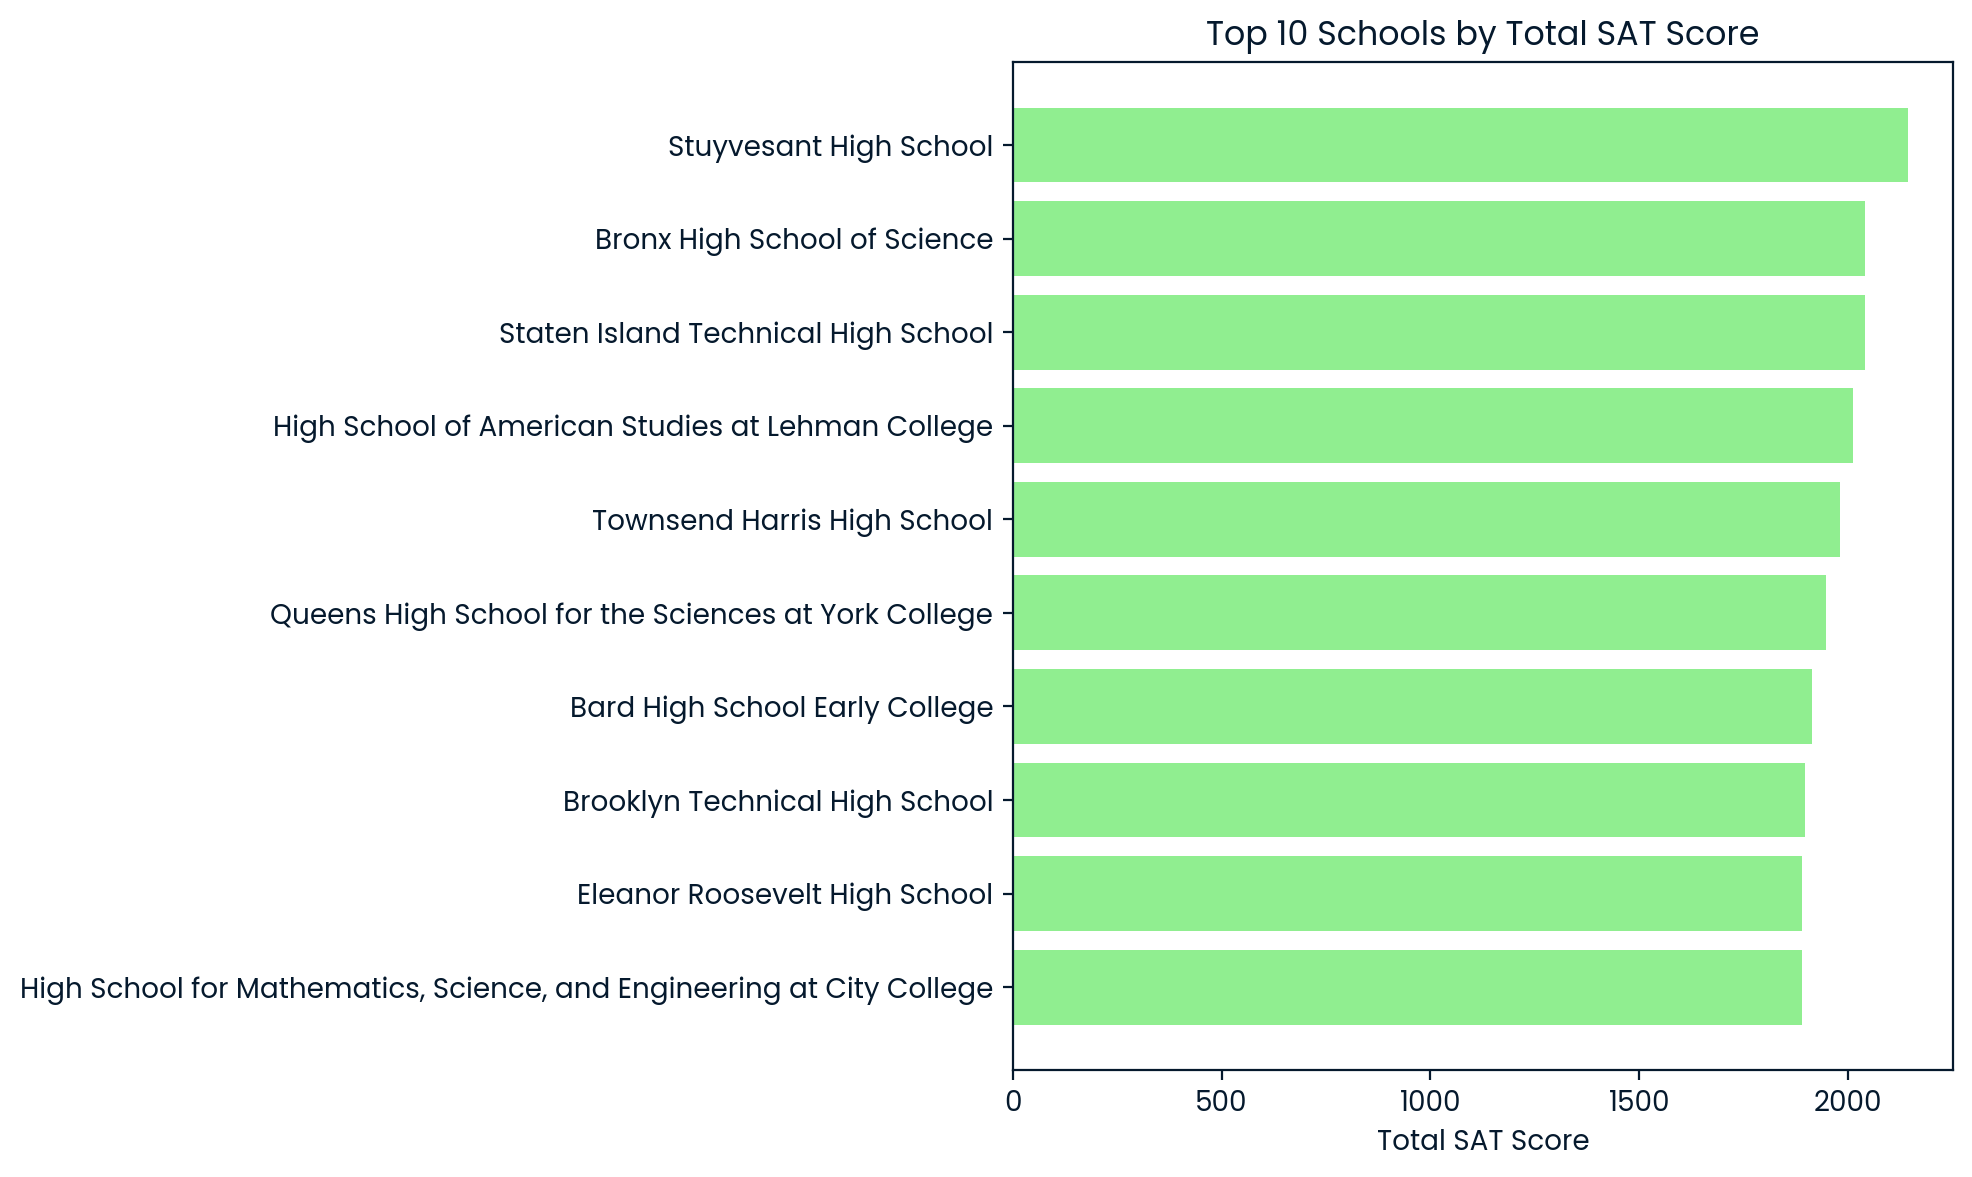

In [55]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_schools['school_name'], top_10_schools['total_SAT'], color='lightgreen')
plt.xlabel('Total SAT Score')
plt.title('Top 10 Schools by Total SAT Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [56]:
#Grouping summary statistics of schools
grouped = schools.groupby('borough').agg(num_schools=('school_name', 'count'),average_SAT=('total_SAT', 'mean'),std_SAT=('total_SAT', 'std')).reset_index()
#Rounding values
grouped[['average_SAT', 'std_SAT']] = grouped[['average_SAT', 'std_SAT']].round(2)
#Save the results as a pandas DataFrame
largest_std_dev = grouped.loc[grouped['std_SAT'].idxmax()].to_frame().T
print(largest_std_dev)

     borough num_schools average_SAT std_SAT
2  Manhattan          89     1340.13  230.29


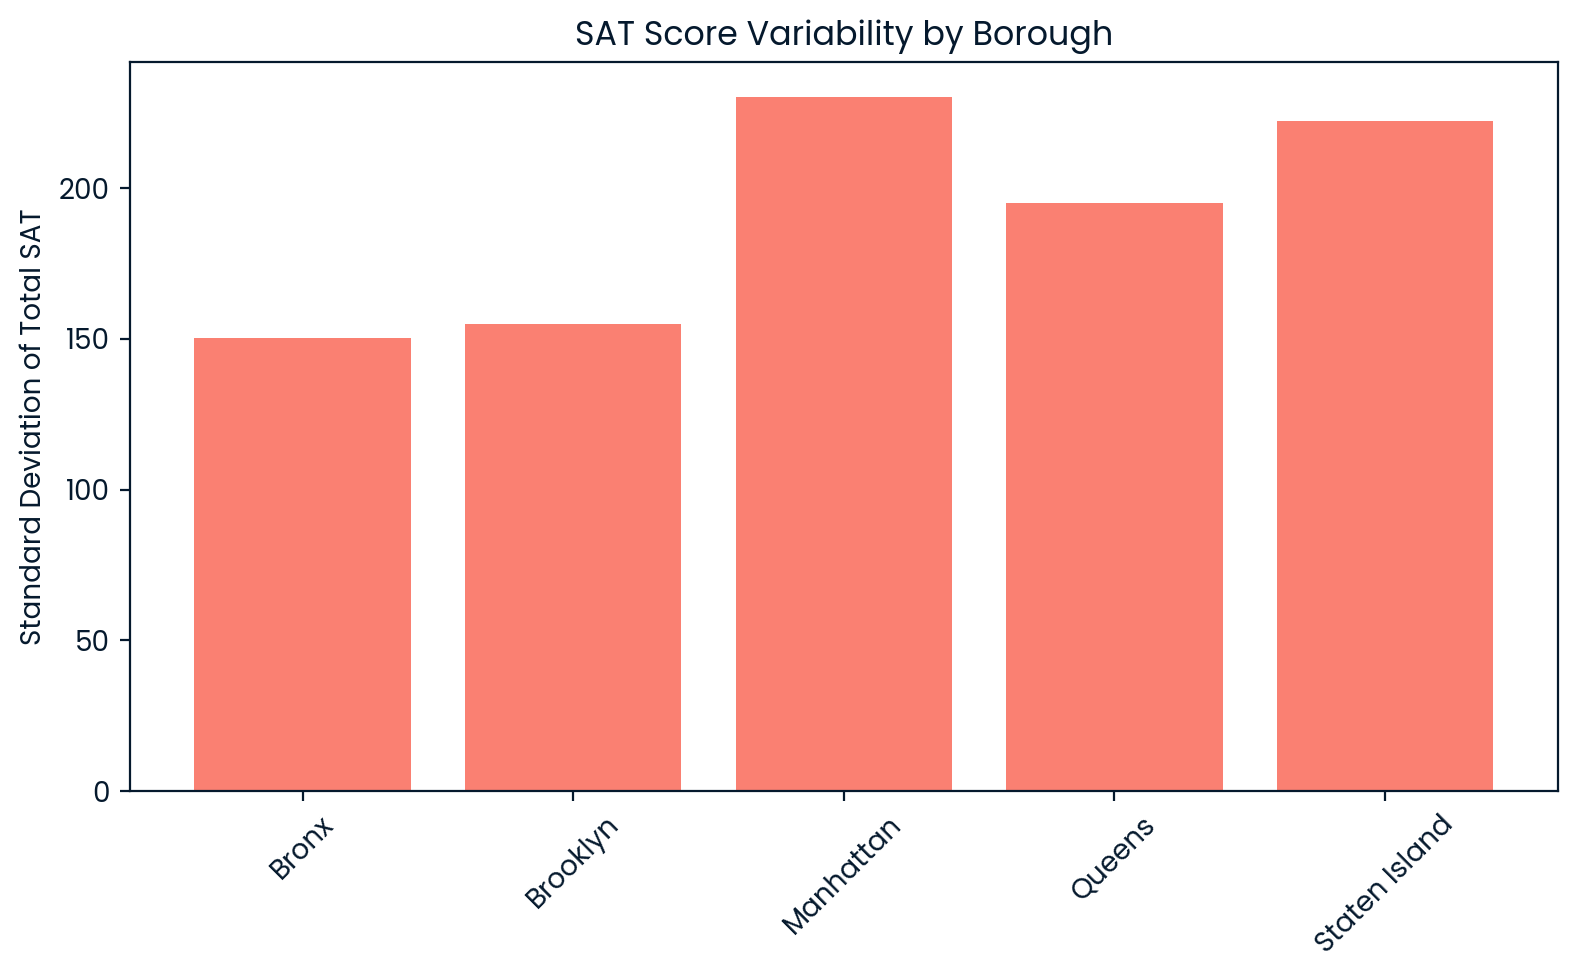

In [57]:
plt.figure(figsize=(8, 5))
plt.bar(grouped['borough'], grouped['std_SAT'], color='salmon')
plt.ylabel('Standard Deviation of Total SAT')
plt.title('SAT Score Variability by Borough')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()